### Setup packages 

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
%pip install progressbar
%pip install plotnine
%pip install torch
%pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12082 sha256=67e030240fb73fcd7c0a6a24b2c45cb0fa14db91f0319b5af29c49f1a79e10c2
  Stored in directory: /root/.cache/pip/wheels/f0/fd/1f/3e35ed57e94cd8ced38dd46771f1f0f94f65fec548659ed855
Successfully built progressbar
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 133 µs (started: 2022-07-10 18:07:03 +00:00)


In [3]:
from plotnine import *
from plotnine.themes import *

time: 1.76 s (started: 2022-07-10 18:07:03 +00:00)


In [4]:
import tensorflow as tf
from scipy.io import loadmat
import random
import math
import tensorflow_probability as tfp
from tqdm import tqdm

time: 2.65 s (started: 2022-07-10 18:07:05 +00:00)


_paper_name_ establishes the reusable name of the paper, it represents the directory under data_papers on the google drive

In [5]:
paper_name = "dgm_hjb"

time: 1.02 ms (started: 2022-07-10 18:07:08 +00:00)


In [6]:
import os, sys
import errno

# make a directory if it does not exist
def make_dir_if_not_exist(used_path):
    if not os.path.isdir(used_path):
        try:
            os.mkdir(used_path)
        except OSError as exc:
            if exc.errno != errno.EEXIST:
                raise exc
            else:
                raise ValueError(f'{used_path} directoy cannot be created because its parent directory does not exist.')

# make directories if they do not exist

#make_dir_if_not_exist("/content/drive/MyDrive/data_papers/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_features/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_history/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_predictions/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_ccs/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/temp/")

time: 6.43 ms (started: 2022-07-10 18:07:08 +00:00)


In [7]:
# Set up the imports
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

import site
import os
import tensorflow as tf
import pandas as pd
import h5py as h5
import matplotlib.pyplot as plt
import errno
import numpy as np
import itertools
import multiprocessing
import json
import datetime
import random
from collections import defaultdict
from sklearn.model_selection import train_test_split

pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 40)


time: 8.48 ms (started: 2022-07-10 18:07:08 +00:00)


In [8]:
import torch 
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
from matplotlib import cm
import pdb
from torch.utils.data import DataLoader


time: 2.89 s (started: 2022-07-10 18:07:08 +00:00)


In [9]:
import plotly.graph_objects as go
import plotly.express as px
from pprint import pprint as pp

time: 2.12 s (started: 2022-07-10 18:07:10 +00:00)


### Shared functions across models

In [10]:
import pandas as pd

def plot_report(train_instance):
        
    history_tl_cpu = [ x for x in train_instance.history_tl ]
    history_internal_cpu = [ x.cpu().detach().numpy() for x in train_instance.history_internal_cpu ]
    history_terminal_cpu = [ x.cpu().detach().numpy() for x in train_instance.history_terminal ]
    history_initial_cpu = [ x.cpu().detach().numpy() for x in train_instance.history_initial ]
    history_nonzero_cpu = [ x.cpu().detach().numpy() for x in train_instance.history_nonzero ]

    obs_data = pd.DataFrame({"Epochs" : [ (x+1)*train_instance.hook_interval for x in range(len(history_initial_cpu))], 
                             "AvgLogLoss": np.log(history_tl_cpu), 
                             "TerminalLogLoss" :  np.log(history_terminal_cpu),
                             "InternalLogLoss" :  np.log(history_internal_cpu),
                             "InitialLogLoss" : np.log(history_initial_cpu),
                             "NonZeroLogLoss" : np.log(history_nonzero_cpu),
                             })

    return (ggplot(obs_data, aes("Epochs","AvgLogLoss")) + geom_line() + geom_point(),
            ggplot(obs_data, aes("Epochs","TerminalLogLoss")) + geom_line() + geom_point(),
            ggplot(obs_data, aes("Epochs","InternalLogLoss")) + geom_line() + geom_point(),
            ggplot(obs_data, aes("Epochs","InitialLogLoss")) + geom_line() + geom_point(),
            ggplot(obs_data, aes("Epochs","NonZeroLogLoss")) + geom_line() + geom_point(),
            )

def plot_activation_mean(train_instance):
    
    # pdb.set_trace()

    if train_instance.debug == False:
        print( 'error: debug is off , turn it on and train again ' )
    else:
        history = np.array(train_instance.history_mean_hooks)
        jet= plt.get_cmap('jet')
        colors = iter(jet(np.linspace(0,1,10)))
        fig, ax = plt.subplots()
        for i in range(history.shape[1]):
            ax.plot(history[:,i], '--r', label= i , color=next(colors) )
        fig.suptitle('Layers activation mean value', fontsize=10)
        leg = ax.legend();


time: 27.7 ms (started: 2022-07-10 18:07:13 +00:00)


In [11]:
# a set up that just maximizes the loss s.t. loss < eps (maximizeloss_weights_st) using the weights on the losses
from scipy.optimize import LinearConstraint, NonlinearConstraint
from scipy.optimize import Bounds
from functools import partial
from scipy.optimize import minimize
from functools import wraps

def negative(f):
    @wraps(f)
    def g(*args,**kwargs):
        return - f(*args,**kwargs)
    # g.__name__ = f'negative({f.__name__})'
    return g
# kl_loss = nn.KLDivLoss(size_average=None, reduction="batchmean")

# we can add more minimization functions here later (e.g. SS diff)
def KLDiffHere( varX, loss_terms, log_target = False, reduction = "mean"):  
  target = torch.tensor([1./len(loss_terms)]*len(loss_terms))*torch.tensor(loss_terms)
  input = torch.tensor(varX*loss_terms)
  loss_pointwise = target * (torch.log(target) - torch.log(input))
  if reduction == "mean":  # default
      loss = loss_pointwise.mean()
  elif reduction == "batchmean":  # mathematically correct
      loss = loss_pointwise.sum() / input.size(0)
  elif reduction == "sum":
      loss = loss_pointwise.sum()
  else:  # reduction == "none"
      loss = loss_pointwise  
  return loss

  # return torch.nn.KLDivLoss(varX*loss_terms,np.array([1./len(loss_terms)]*len(loss_terms))*loss_terms)

def minimize_weights_st(loss_terms, loss_func):
  bounds = Bounds([0]*len(loss_terms), [1.0]*len(loss_terms))
  linear_constraint = LinearConstraint([[1]*len(loss_terms)], [1.0], [1.0])
  x0 = [0.25]*len(loss_terms)
  res = minimize( partial(loss_func, loss_terms=loss_terms), 
                  x0, 
                  method='trust-constr', 
                  constraints=[linear_constraint],
                  options={'verbose': 0}, 
                  bounds=bounds )
  return res

def maximizeloss_weights_st(loss_terms, loss_func, eps):
  bounds = Bounds([0]*len(loss_terms), [1.0]*len(loss_terms))
  linear_constraint = LinearConstraint([[1]*len(loss_terms)], [1.0], [1.0])
  nonlinear_constraint  = NonlinearConstraint(negative(partial(loss_func, loss_terms=loss_terms)),1E-9,eps)
  # even though zero is the KL minimum it helps to put a negative number here to explore

  x0 = [1.0/len(loss_terms)]*len(loss_terms)
  res = minimize( negative(partial(loss_func, loss_terms=loss_terms)), 
                  x0, 
                  method='trust-constr', 
                  constraints=[linear_constraint, nonlinear_constraint],
                  options={'verbose': 0}, 
                  bounds=bounds )
  return res


time: 31.6 ms (started: 2022-07-10 18:07:13 +00:00)


In [12]:
r1 = maximizeloss_weights_st( [ 34.25, 100.12, 23.45] , KLDiffHere, 1E9)
print(r1.x)

[0.33334757 0.33333761 0.33331482]
time: 95.4 ms (started: 2022-07-10 18:07:13 +00:00)


In [13]:
### There is an issue getting this to work because of nonlinear_constraint  = NonlinearConstraint(negative(partial(loss_func, loss_terms=loss_terms)),1E-9,eps)

    # def calculateLossAdaptWeights(self , size = 2**8 , train = True, min_max = True):
    #     '''
    #     Helper function that Sample and Calculate loss,
    #     This is adapted in that it changes the weights on the losses to maximize the loss provided
    #     the KL distance of the new weighting is within self.eps of the previous distribution (starting at equally weighted)
    #     '''        
    #     x , x_terminal , x_boundary = self.sample(size)
    #     x = Variable( x , requires_grad=True)
    #     Ls = self.criterion( x , x_terminal , x_boundary )
    #     DO , TC , BC = Ls
    #     DOm = torch.mean(DO).detach().cpu().float().item()
    #     TCm = torch.mean(TC).detach().cpu().float().item()
    #     BCm = torch.mean(BC).detach().cpu().float().item()

    #     losses_for_reweighting = [ torch.mean(lv).detach().cpu().float().item() for lv in Ls if list(lv.size())] 
    #     mask_for_available_losses = [ True if list(lv.size()) else False for lv in Ls ]

    #     # print([ DOm, TCm, BCm])
    #     # if is.nan(DOm):
    #     #   print(DO)

    #     if self.weights is None:
    #       self.weights = torch.ones(1,len(Ls))/len(Ls)

    #     # pdb.set_trace()

    #     if min_max:
    #         r1 = maximizeloss_weights_st( losses_for_reweighting , KLDiffHere, self.eps)
    #         candidate_weigths = torch.zeros_like(self.weights).to(torch.device("cuda:0"))
    #         candidate_weigths[0][mask_for_available_losses] = torch.tensor(r1.x).to(torch.device("cuda:0")).float()
    #         self.weights = candidate_weigths.to(torch.device("cuda:0"))
    #         self.weights_tbl.append(self.weights.detach().cpu().numpy())

    #     numActive = np.sum([1 if list(lv.size()) else 0 for lv in Ls ])
    #     if train == True:
    #         return  (self.weights[0,0]*torch.mean(DO) + 
    #                  self.weights[0,1]*torch.mean(TC) + 
    #                  self.weights[0,2]*torch.mean(BC)) , \
    #                  self.weights[0,0]*torch.mean(DO) , \
    #                  self.weights[0,1]*torch.mean(TC) , \
    #                  self.weights[0,2]*torch.mean(BC) , \
    #                  (1./numActive*torch.mean(DO) + 
    #                  1./numActive*torch.mean(TC) + 
    #                  1./numActive*torch.mean(BC))             
    #     else:
    #         return  DO , TC , BC


time: 4.6 ms (started: 2022-07-10 18:07:13 +00:00)


In [14]:
import torch
from torch.distributions import Normal

std_norm_cdf = Normal(0, 1).cdf
std_norm_pdf = lambda x: torch.exp(Normal(0, 1).log_prob(x))

def bs_price(right, K, S, T, sigma, r):
    d_1 = (1 / (sigma * torch.sqrt(T))) * (torch.log(S / K) + (r + (torch.square(sigma) / 2)) * T)
    d_2 = d_1 - sigma * torch.sqrt(T)
    
    if right == "C":
        C = std_norm_cdf(d_1) * S - std_norm_cdf(d_2) * K * torch.exp(-r * T)
        return C
        
    elif right == "P":
        P = std_norm_cdf(-d_2) * K * torch.exp(-r * T) - std_norm_cdf(-d_1) * S
        return P

time: 10.1 ms (started: 2022-07-10 18:07:13 +00:00)


In [15]:
import torch

def to_cpu_detach(x):
  if isinstance(x, list):
    return [ y.detach().cpu().item() for y in x ]
  else:
    return x.detach().cpu().item()

time: 2.6 ms (started: 2022-07-10 18:07:13 +00:00)


In [16]:
def huber_loss_zero_target(x, delta = 1.0):
  loss_function = torch.nn.HuberLoss(delta=delta)
  return loss_function(x, torch.zeros_like(x))


time: 1.55 ms (started: 2022-07-10 18:07:13 +00:00)


In [17]:
# def save_model_train(lr, net,  eqLossFn, sample_method, trainObj, eqType, eqObject = None ):

#   model_id_str =  f"{eqType}_{datetime.datetime.now():%Y%m%d%H%M%S}_{eqLossFn}_{sample_method}_{trainObj.stop_epoch}_{str(lr).replace('.','p')}_{net.NL}_{net.NN}"
  
#   if eqObject is not None:
#     try:
#         beta = getattr(eqObject,"beta")
#         beta_str = str(beta).replace('.','p')
#         model_id_str = model_id_str + f"_beta{beta_str}"
#     except AttributeError:
#         pass
#     try:
#         wgamma = getattr(eqObject,"wgamma")
#         wgamma_str = str(wgamma).replace('.','p')
#         model_id_str = model_id_str + f"_wgamma{wgamma_str}"
#     except AttributeError:
#         pass
  
#   torch.save(net.state_dict(), f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{model_id_str}")
#   df_at_hookintervals = None
#   train_losses = None
#   validation_losses = None
#   try:
#       df_at_hookintervals = getattr(trainObj, "history_surfaces_hooks")
#       if df_at_hookintervals is not None:
#         df_at_hookintervals.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationHook_{trainObj.hook_interval}_{model_id_str}.csv", index=False)
#   except AttributeError:
#       print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "history_surfaces_hooks"))

#   try:
#       train_losses = getattr(trainObj,"train_losses")
#       if train_losses is not None:
#         train_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/trainlosses_{model_id_str}.csv", sep = ',')    
#   except AttributeError:
#       print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))
#       # raise NotImplementedError("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))

#   try:
#       validation_losses = getattr(trainObj,"validation_losses")
#       if validation_losses is not None:
#         validation_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationlosses_{model_id_str}.csv", sep = ',')    
#   except AttributeError:
#       print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "validation_losses"))

time: 4.04 ms (started: 2022-07-10 18:07:13 +00:00)


In [18]:
def save_model_train_stratified(lr, net,  eqLossFn, sample_method, trainObj, eqType, eqObject = None ):

  model_id_str =  f"{eqType}_{datetime.datetime.now():%Y%m%d%H%M%S}_{eqLossFn}_{sample_method}_{trainObj.stop_epoch}_{str(lr).replace('.','p')}_{net.NL}_{net.NN}"
  
  if eqObject is not None:
    try:
        beta = getattr(eqObject,"beta")
        beta_str = str(beta).replace('.','p')
        model_id_str = model_id_str + f"_beta{beta_str}"
    except AttributeError:
        pass
    try:
        wgamma = getattr(eqObject,"wgamma")
        wgamma_str = str(wgamma).replace('.','p')
        model_id_str = model_id_str + f"_gamma{wgamma_str}"
    except AttributeError:
        pass
    try:
        xbreaks = getattr(eqObject,"xbreaks")
        xbreaks_str = str(len(xbreaks))
        model_id_str = model_id_str + f"_StSaXbrks{xbreaks_str}"
    except AttributeError:
        pass
    try:
        tbreaks = getattr(eqObject,"tbreaks")
        tbreaks_str = str(len(tbreaks))
        model_id_str = model_id_str + f"_StSaTbrks{tbreaks_str}"
    except AttributeError:
        pass
  
  torch.save(net.state_dict(), f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{model_id_str}")
  df_at_hookintervals = None
  train_losses = None
  validation_losses = None
  try:
      df_at_hookintervals = getattr(trainObj, "history_surfaces_hooks")
      if df_at_hookintervals is not None:
        df_at_hookintervals.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationHook_{trainObj.hook_interval}_{model_id_str}.csv", index=False)
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "history_surfaces_hooks"))

  try:
      train_losses = getattr(trainObj,"train_losses")
      if train_losses is not None:
        train_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/trainlosses_{model_id_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))
      # raise NotImplementedError("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))

  try:
      validation_losses = getattr(trainObj,"validation_losses")
      if validation_losses is not None:
        validation_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationlosses_{model_id_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "validation_losses"))

time: 27.4 ms (started: 2022-07-10 18:07:13 +00:00)


### Cartea-Jaimungal Optimal Execution Problem

[Extensions of the Deep Galerkin Method](https://arxiv.org/pdf/1912.01455v3.pdf)

#### Value Net - $H$

In [19]:
class ValueNet(nn.Module):
    def __init__(self , in_size, NL , NN, activation = torch.tanh):
        super(ValueNet, self).__init__()
        self.in_size = in_size
        self.NL = NL
        self.NN = NN
        self.Input = in_size 
        self.fc_input = nn.Linear(self.Input,self.NN)
        torch.nn.init.xavier_uniform_(self.fc_input.weight)
        self.linears = nn.ModuleList([nn.Linear(self.NN, self.NN) for i in range(self.NL)])
        for i, l in enumerate(self.linears):    
            torch.nn.init.xavier_uniform_(l.weight)
        self.fc_output = nn.Linear(self.NN,1)
        torch.nn.init.xavier_uniform_(self.fc_output.weight)
        self.act = activation
        
    def forward(self, x):
        h = self.act(self.fc_input(x))
        for i, l in enumerate(self.linears):
            h = self.act( l(h) )
        out = self.fc_output(h)
        return out 

time: 12.5 ms (started: 2022-07-10 18:07:13 +00:00)


#### Control Net - $\nu$

In [20]:
import torch.nn.functional as F

class ControlNet(nn.Module):
    def __init__(self , in_size,  NL  , NN, activation = torch.relu  ):
        super(ControlNet, self).__init__()
        self.in_size = in_size
        self.NL = NL
        self.NN = NN
        self.Input = in_size  
        self.fc_input = nn.Linear(self.Input,self.NN)
        torch.nn.init.xavier_uniform_(self.fc_input.weight)
        self.linears = nn.ModuleList([nn.Linear(self.NN, self.NN) for i in range(self.NL)])
        for i, l in enumerate(self.linears):    
            torch.nn.init.xavier_uniform_(l.weight)            
        # self.fc_output_d = nn.Linear(self.NN, 2)
        # self.fc_output = torch.nn.Softmax(dim=1)
        self.fc_output = nn.Linear(self.NN, 1)
        torch.nn.init.xavier_uniform_(self.fc_output.weight)
        self.act = activation
        
    def forward(self, x):
        h = self.act( self.fc_input(x)  )
        for i, l in enumerate(self.linears):
            h = self.act( l(h) )
        # out = self.fc_output_d(h)
        out = self.fc_output(h)
        return out
        

time: 24.2 ms (started: 2022-07-10 18:07:13 +00:00)


#### Alternative Control Net -  $\nu$

[implement from github](https://github.com/Plemeur/DGM/blob/master/first_net.py)

In [21]:
class LinearWithXavier(nn.Module):
    """ Copy of linear module from Pytorch, modified to have a Xavier init,
        TODO : figure out what to do with the bias"""
    def __init__(self, in_features, out_features, bias=True, batch_normalize=True):
        super(LinearWithXavier, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = torch.nn.Parameter(torch.Tensor(out_features, in_features))
        self.batch_normalize = batch_normalize
        
        if self.batch_normalize == True:
          self.batch_norm = torch.nn.BatchNorm1d(out_features)
        
        if bias:
            self.bias = torch.nn.Parameter(torch.Tensor(out_features))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()
    
    def reset_parameters(self):
        torch.nn.init.xavier_uniform_(self.weight)
        if self.bias is not None:
            torch.nn.init.uniform_(self.bias, -1, 1) #boundary matter?
    
    def forward(self, input):
        if self.batch_normalize == True:
          return self.batch_norm(torch.nn.functional.linear(input, self.weight, self.bias))
        return torch.nn.functional.linear(input, self.weight, self.bias)
    
    def extra_repr(self):
        return 'in_features={}, out_features={}, bias={}'.format(
            self.in_features, self.out_features, self.bias is not None
        )


class DGM_layer(nn.Module):
    """ See readme for paper source"""
    def __init__(self, in_features, out_feature, residual=False, batch_normalize=False):
        super(DGM_layer, self).__init__()
        self.residual = residual

        self.Z = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UZ = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)
        self.G = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UG = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)
        self.R = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UR = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)
        self.H = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UH = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)

    def forward(self, x, s):
        z = torch.tanh(self.UZ(x) + self.Z(s))
        g = torch.tanh(self.UG(x) + self.G(s))
        r = torch.tanh(self.UR(x) + self.R(s))
        h = torch.tanh(self.UH(x) + self.H(s * r))
        return (1 - g) * h + z * s


class AlternativeControlNet(nn.Module):

    def __init__(self, in_size, out_size, neurons, depth):
        super(AlternativeControlNet, self).__init__()
        self.neurons=neurons
        self.depth=depth

        self.dim = in_size
        self.input_layer = LinearWithXavier(in_size, neurons)
        self.middle_layer = nn.ModuleList([DGM_layer(in_size, neurons) for i in range(depth)])
        # self.middle_layer_2 = nn.ModuleList([DGM_layer(in_size, neurons, batch_normalize=False) for i in range(2)])
        self.final_layer = LinearWithXavier(neurons, out_size, batch_normalize=False)

    def forward(self, X):
        s = torch.tanh(self.input_layer(X))
        for i, layer in enumerate(self.middle_layer):
            s = torch.tanh(layer(X, s))
        
        # for i, layer in enumerate(self.middle_layer_2):
        #     s = torch.tanh(layer(X, s))
        
        # s = torch.nn.functional.gelu(self.input_layer(X))
        # for i, layer in enumerate(self.middle_layer):
        #     s = torch.nn.functional.elu(layer(X, s))
        # for i, layer in enumerate(self.middle_layer):
        #     s = torch.nn.functional.gelu(layer(X, s))
        # for i, layer in enumerate(self.middle_layer_2):
        #     s = torch.nn.functional.gelu(layer(X, s))

        return self.final_layer(s)
        # return torch.pow(self.final_layer(s), 1)


time: 102 ms (started: 2022-07-10 18:07:13 +00:00)


In [22]:
class DGMLayerPaper(nn.Module):

    def __init__(self, in_features, out_feature, activation=torch.relu, residual=False):
        
        super(DGMLayerPaper, self).__init__()
        self.residual = residual
        self.activation = activation

        self.Z = LinearWithXavier(out_feature, out_feature) # w.S
        self.UZ = LinearWithXavier(in_features, out_feature, bias=True) # u.x
        self.G = LinearWithXavier(out_feature, out_feature)
        self.UG = LinearWithXavier(in_features, out_feature, bias=True)
        self.R = LinearWithXavier(out_feature, out_feature)
        self.UR = LinearWithXavier(in_features, out_feature, bias=True)
        self.H = LinearWithXavier(out_feature, out_feature) # w.(S(o)R)
        self.UH = LinearWithXavier(in_features, out_feature, bias=True)

    def forward(self, x, s):
        z = self.activation(self.UZ(x) + self.Z(s))
        g = self.activation(self.UG(x) + self.G(s))
        r = self.activation(self.UR(x) + self.R(s))
        h = self.activation(self.UH(x) + self.H(s * r))
        return (1 - g) * h + z * s


class MertonMatchPiNet(nn.Module):

    def __init__(self, in_size, out_size, neurons, depth):
        super(MertonMatchPiNet, self).__init__()
        self.dim = in_size
        self.input_layer = LinearWithXavier(in_size, neurons)
        self.middle_layer = nn.ModuleList([DGMLayerPaper(in_size, neurons) for i in range(depth)])
        self.final_layer = LinearWithXavier(neurons, out_size)

    def forward(self, X):
        s = torch.tanh(self.input_layer(X))
        for i, layer in enumerate(self.middle_layer):
            s = torch.tanh(layer(X, s))

        return self.final_layer(s)


time: 24.7 ms (started: 2022-07-10 18:07:13 +00:00)


####Control equation

In [23]:
# tau, cash, asset price, inventory, asset volatility, running cost, terminal cost, temporary, and permament price impacts
# tau,   x,     S,           q,            sigma,         phi,         alpha,         kappa,             beta

class ControlEquation():

    def __init__(self, control_net, du_dx, du_dS, du_dq, curr_epoch=0):
        
        self.control_net = control_net
        self.grads = du_dx, du_dS, du_dq
        self.curr_epoch = curr_epoch

    def criterion(self, x_internal, grads):
      
      du_dx, du_dS, du_dq = grads
      #print('gradient shapes:', du_dx.shape, du_dS.shape, du_dq.shape)

      control_preds = self.control_net(x_internal)
      control_preds = control_preds.reshape(-1,1)
      #print('control net prediction shape:', control_preds.shape)

      #tau = x_internal[:,0].reshape(-1, 1)
      #x = x_internal[:,1].reshape(-1, 1)
      S = x_internal[:,2].reshape(-1, 1)
      #q = x_internal[:,3].reshape(-1, 1)
      #sigma = x_internal[:,4].reshape(-1, 1)
      #phi = x_internal[:,5].reshape(-1, 1)
      #alpha = x_internal[:,6].reshape(-1, 1)
      kappa = x_internal[:,7].reshape(-1, 1)
      beta = x_internal[:,8].reshape(-1, 1)

      
      intC = None
      # tau, cash, asset price, inventory, asset volatility, running cost, terminal cost, temporary, and permament price impacts
      if len(x_internal) == 0:
        intC_loss = torch.tensor(0).cuda().float()  
      else:
        
        # nu * (S - kappa * nu)
        loss_1 = control_preds * (S - kappa * control_preds)
        #print('loss1 shape:', loss_1.shape)
        
        # - b * nu
        loss_2 = -1. * beta * control_preds
        #print('loss2 shape:', loss_2.shape)
        
        # - nu
        loss_3 = -1. * control_preds
        #print('loss3 shape:', loss_3.shape)
        
        intC_loss = -1. * (loss_1 * du_dx + loss_2 * du_dS + loss_3 * du_dq)
        #print('total internal loss shape:', intC_loss.shape)

      return intC_loss

    def calculateControlLoss(self, x_internal, grads, keep_batch = False):
        '''
        Helper function that Sample and Calculate loss,
        '''        
        Ls = self.criterion( x_internal, grads)
        
        if not keep_batch:          
          return torch.mean(Ls)           
        else:
          return Ls

time: 32.5 ms (started: 2022-07-10 18:07:13 +00:00)


#### TrainInternalControlWithDGM


In [24]:
class TrainInternalControl():
    
    def __init__(self, value_equation, control_equation, BATCH_SIZE, epoch, lr, debug = False):
        
        self.value_model = value_equation        
        self.control_model = control_equation
        self.BATCH_SIZE = BATCH_SIZE
        
        self.debug = debug  
        self.hook_interval = 100    
        
        if self.debug == True:
            self.hooks = {}            
            self.get_all_layers(self.control_model.control_net)

        self.optimizer_used = optim.Adam
        self.stop_epoch = 0  
        self.epoch = epoch
        self.lr = lr
        
    def train(self , eqLossFn = 'calculateControlLoss', sample_method_X = "U", sample_batch = None):
        
        # set it to train mode
        self.control_model.control_net.train()
        
        optimizer = self.optimizer_used(self.control_model.control_net.parameters(), self.lr)
        if self.value_model.control_optim_state is not None:
            optimizer.load_state_dict(self.value_model.control_optim_state)
        
        #if self.value_model.control_optim_state is None:
        #    optimizer = self.optimizer_used(self.control_model.control_net.parameters(), self.lr)
        #else:
        #    optimizer = self.value_model.control_optim_state

        loss_avg = 0.0
        loss_calc_method = None
        
        try:
            loss_calc_method = getattr(self.control_model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.control_model.__class__.__name__, eqLossFn))
        
        if sample_batch is None:
            sample_batch = self.value_model.sample(sample_method_X = sample_method_X, size=self.BATCH_SIZE)

        x_internal, _ = sample_batch

        for e in range(self.epoch):

            optimizer.zero_grad()
  
            loss  = loss_calc_method(x_internal, self.control_model.grads, keep_batch = False )            
            
            loss_avg = loss_avg + float(loss.item())
            
            loss.backward()
            
            optimizer.step()
            
            #if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:
            if (self.control_model.curr_epoch % self.hook_interval == (self.hook_interval-1)) and e==0:

                loss_avg = loss_avg/self.hook_interval
                print("Control Epoch {} - lr {} -  key loss: {}".format(self.control_model.curr_epoch, self.lr , loss_avg))
                loss_avg = 0.0
        
        self.value_model.control_optim_state = optimizer.state_dict()
        self.stop_epoch = e

    def hook_fn(self, m, i, o):
              self.hooks[m] = o.detach()
            
    def get_all_layers(self, net):
      for name, layer in net._modules.items():
          if isinstance(layer, nn.ModuleList):
              for n , l in layer.named_children():
                l.register_forward_hook(self.hook_fn)
          else:
              # it's a non sequential. Register a hook
              layer.register_forward_hook(self.hook_fn)

time: 52.1 ms (started: 2022-07-10 18:07:13 +00:00)


#### ValueEquation

In [25]:
class ValueEquation():
    
    def __init__(self , value_net, control_net, control_net_epoch, control_net_lr):

        self.value_net = value_net
        self.control_net = control_net

        self.T = 1.0
        self.MAX_x = 1.0
        self.MAX_S = 1.0
        self.MAX_q = 5.0
        self.MAX_sigma = 0.5
        self.MAX_phi = 0.2
        self.MAX_alpha = 0.2
        self.MAX_kappa = 0.05
        self.MAX_beta = 0.005

        self.control_net_epoch = control_net_epoch
        self.control_net_lr = control_net_lr

        self.epoch_of_u = None
        self.control_optim_state = None


    @staticmethod
    def to_device(x, to_cpu):
      if to_cpu:
        return x.cpu()
      else:
        return x.cuda()


    def sample(self , sample_method_X = "U", size = 2**8, to_cpu = False ):
        '''
        Sampling function
        '''
        if sample_method_X in ["U"]:
            
            # tau,   x,     S,           q,            sigma,         phi,         alpha,         kappa,             beta
            ### internal samples of tau, cash, asset price, inventory, asset vol, running cost, terminal cost, temporary and permament price impacts
            x_internal = self.to_device(torch.cat(( (1 - torch.rand([size,1])) * self.T, # tau
                                                    (1 - torch.rand([size, 1])) * self.MAX_x, # cash
                                                   (1 - torch.rand([size,1])) * self.MAX_S, # price
                                                   torch.rand([size,1]) * self.MAX_q,  # inventory
                                                   0.1 + (1 - torch.rand([size,1])) * self.MAX_sigma, # vol
                                                   1e-3 + torch.rand([size,1]) * self.MAX_phi, # running cost
                                                   1e-3+ torch.rand([size,1]) * self.MAX_alpha, # terminal cost
                                                   1e-3+ torch.rand([size,1]) * self.MAX_kappa, # temporaty impact
                                                   1e-4+ torch.rand([size,1]) * self.MAX_beta, # permanent impact
                                                   ) , dim = 1 ),to_cpu)
            ### Terminal time samples

            x_terminal = self.to_device(torch.cat(( torch.zeros([size,1]), # tau
                                                    (1 - torch.rand([size, 1])) * self.MAX_x, # cash
                                                   (1 - torch.rand([size,1])) * self.MAX_S, # price
                                                   torch.rand([size,1]) * self.MAX_q,  # inventory
                                                   0.1 + (1 - torch.rand([size,1])) * self.MAX_sigma, # vol
                                                   1e-3 + torch.rand([size,1]) * self.MAX_phi, # running cost
                                                   1e-3 + torch.rand([size,1]) * self.MAX_alpha, # terminal cost
                                                   1e-3 + torch.rand([size,1]) * self.MAX_kappa, # temporaty impact
                                                   1e-4 + torch.rand([size,1]) * self.MAX_beta, # permanent impact
                                                   ) , dim = 1 ),to_cpu)
            
            return x_internal , x_terminal

        raise ValueError(f"{sample_method_X} is not a supported sampling method")
        

    def get_num_control_epochs(self):

      return self.control_net_epoch


    def get_value_function_derivatives(self, value_net_val, x_internal, normalize=False):
        du = torch.autograd.grad( value_net_val, 
                                  x_internal, 
                                  grad_outputs=torch.ones_like(value_net_val),
                                  create_graph=True)
        #t, x, S, q
        du_dt = du[0][:,0].reshape(-1,1)
        du_dx = du[0][:,1].reshape(-1,1)
        du_dS = du[0][:,2].reshape(-1,1)
        du_dq = du[0][:,3].reshape(-1,1)  

        d2u_dS2 = torch.autograd.grad(du_dS, 
                                      x_internal , 
                                      grad_outputs=torch.ones_like(du_dS),
                                      create_graph=True, allow_unused=True
                                      )[0][:,2].reshape(-1,1)
        
        return du_dt, du_dx, du_dS, du_dq, d2u_dS2
    

    #def Pi_star(self, x, gamma=1):
    #    lamda = (x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/x[:,4].reshape(-1,1)
    #    return lamda / (gamma * x[:,4].reshape(-1,1)) * torch.exp(-1. * x[:,3].reshape(-1,1)*x[:,0].reshape(-1,1))

        
    #def Htx(self, x, gamma=1):
    #  # 3.6a in https://arxiv.org/abs/1912.01455v3
    #  #  wealth * gamma * exp(r*tau)
    #  part_a = x[:,1].reshape(-1,1)*gamma*torch.exp(x[:,3].reshape(-1,1) * x[:,0].reshape(-1,1))
    #  #  0.5* tau *[(mu - r)/sigma]^2
    #  part_b = 0.5 * x[:,0].reshape(-1,1) * ((x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/(x[:,4].reshape(-1,1)))**2 
    #  return -1.0*torch.exp(-part_a - part_b)

    
    #def dHdx(self, x, gamma=1):
        
    #    return self.Htx(x) * (-1 * gamma*torch.exp(x[:,3].reshape(-1,1) * x[:,0].reshape(-1,1)))

    
    #def d2Hdx2(self, x, gamma=1):
        
    #    return self.Htx(x) * gamma**2 * torch.exp(2* x[:,3].reshape(-1,1) * x[:,0].reshape(-1,1))


    def criterion(self, x_internal, x_terminal, loss_transforms = [torch.square], value_network=None):
        '''
        Loss function that helps network find solution to equation
        '''   
        # Time / Wealth / Mu / r / Sigma (sample data order)
        # pdb.set_trace()
        
        value_net_val = value_network(x_internal)
        #print(torch.mean(value_net_val), torch.min(value_net_val), torch.max(value_net_val))

        
        # Trying to used a correct solution to see Pi convergence
        #u_net_val = self.Htx(x_internal)
        #du_dx, d2u_dx2 = self.dHdx(x_internal), self.d2Hdx2(x_internal)
        #du_dt = torch.zeros_like(du_dx)


        du_dt, du_dx, du_dS, du_dq, d2u_dS2 = self.get_value_function_derivatives(value_net_val, x_internal)
        #print('Value net derivatives shape:', du_dt.shape, du_dx.shape, du_dS.shape, du_dq.shape, d2S_dS2.shape)


        control_model = ControlEquation(self.control_net, du_dx.detach(), du_dS.detach(), du_dq.detach())
        control_model.curr_epoch = self.epoch_of_u              
        
        control_trainer = TrainInternalControl(self, control_model, 
                                            x_internal.shape[0], 
                                            self.get_num_control_epochs(), 
                                            self.control_net_lr, 
                                            debug=True)
        
        control_trainer.train(sample_batch=(x_internal, x_terminal))

        #tau = x_internal[:,0].reshape(-1, 1)
        #x = x_internal[:,1].reshape(-1, 1)
        S = x_internal[:,2].reshape(-1, 1)
        q = x_internal[:,3].reshape(-1, 1)
        sigma = x_internal[:,4].reshape(-1, 1)
        phi = x_internal[:,5].reshape(-1, 1)
        #alpha = x_internal[:,6].reshape(-1, 1)
        kappa = x_internal[:,7].reshape(-1, 1)
        beta = x_internal[:,8].reshape(-1, 1)
          

        if loss_transforms is None:
          loss_transforms = [torch.square]

        intC = None
        terC = None

        if len(x_internal) == 0:
          intC = [ torch.tensor(0).cuda().float() for loss_transform in loss_transforms ] 
        else:
          
          control_preds = self.control_net(x_internal)
          #pi_net_preds = (x_internal[:,2].reshape(-1,1) - x_internal[:,3].reshape(-1,1)) / (x_internal[:,4].reshape(-1,1) ** 2) * (du_dx / d2u_dx2)
          
          control_preds = control_preds.detach().reshape(-1,1)
          #print('Pi net prediction inside Unet:', pi_net_preds.shape)

          # nu * (S - kappa * nu)
          loss_1 = control_preds * (S - kappa * control_preds)
          #print('loss1 shape:', loss_1.shape)
          
          # - b * nu
          loss_2 = -1. * beta * control_preds
          #print('loss2 shape:', loss_2.shape)
          
          # - nu
          loss_3 = -1. * control_preds
          #print('loss3 shape:', loss_3.shape)
          
          control_loss = loss_1 * du_dx + loss_2 * du_dS + loss_3 * du_dq
          #print('Control loss shape:', control_loss.shape)
          
          # it is minus in front of time derivative as it is time to maturity instead of elapsed time
          intC_loss = -du_dt + 0.5 * sigma**2 * d2u_dS2 - phi * q ** 2 + control_loss
          
          #print(torch.mean(intC_loss), torch.min(intC_loss), torch.max(intC_loss))
          #print('interim total loss in unet shape:', intC_loss.shape)

          intC = [ loss_transform(intC_loss) for loss_transform in loss_transforms ] 
        
        #print('Terminal condition shapes:')
        #print(self.g(x_terminal).shape)
        #print(value_network(x_terminal).shape)

        terC = [ loss_transform(self.g(x_terminal) - value_network(x_terminal)) for loss_transform in loss_transforms ]
        
        #print('min d2u_dS2:', d2u_dS2.min(),'max d2u_dS2:', d2u_dS2.max())
        #print('min du_dx:', du_dx.min(),'max du_dx:', du_dx.max())
        #print('min du_dq:', du_dq.min(),'max du_dq:', du_dq.max())
        #print('min du_dS:', du_dS.min(),'max du_dS:', du_dS.max())
        
        return intC, terC

    
    def g(self, x):

        # x + S*q - alpha * q**2
        return x[:, 1].reshape(-1, 1) + x[:,2].reshape(-1, 1) * x[:,3].reshape(-1, 1) - x[:,6].reshape(-1, 1) *  x[:,3].reshape(-1, 1) ** 2

    
    def calculateLoss(self, batch_x, train = True, loss_transforms = [ torch.square ], keep_batch = False, value_network=None):
        '''
        Helper function that Sample and Calculate loss,
        '''        
        # pdb.set_trace()
        x_internal , x_terminal = batch_x
        x_internal = Variable( x_internal , requires_grad=True)
        
        Ls = self.criterion(x_internal , x_terminal, loss_transforms = loss_transforms, value_network=value_network)
        intC, terC = Ls

        return_losses = []
        # print('internal Loss', torch.mean(intC[0]))
        # print('external Loss', torch.mean(terC[0]))

        for lc in range(len(loss_transforms)):
          if not keep_batch:
            loss_equalWeightedByType = torch.mean(intC[lc]) + torch.mean(terC[lc])
            return_losses.append( [   loss_equalWeightedByType , 
                                      torch.mean(intC[lc]) , 
                                      torch.mean(terC[lc])
                                   ] )            
          else:
            return_losses.append( [intC.numpy(), terC.numpy()] )
        return return_losses


time: 413 ms (started: 2022-07-10 18:07:13 +00:00)


#### Save info from run

In [26]:
def save_model_train(training, eqObject, lr, eqLossFn, sample_method, loss, batch_size, epoch): 

  model_id_base_str =  f"{eqObject.__class__.__name__}_{datetime.datetime.now():%Y%m%d%H%M%S}_{batch_size}_{str(torch.round(loss,decimals=2)).replace('.','p')}"
  model_id_base_str = model_id_base_str + f"_{eqLossFn}_{sample_method}_{epoch}_{str(lr).replace('.','p')}"  
  model_id_base_str = model_id_base_str + f"_U{eqObject.u_net.neurons}_U{eqObject.u_net.depth}_P{eqObject.pi_net.neurons}_P{eqObject.pi_net.depth}"
  
  torch.save(eqObject.u_net.state_dict(),  f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/{model_id_base_str}_U")
  torch.save(eqObject.pi_net.state_dict(), f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/{model_id_base_str}_P")

  df_at_hookintervals = None
  train_losses = None
  validation_losses = None
  try:
      df_at_hookintervals = getattr(training, "history_surfaces_hooks")
      if df_at_hookintervals is not None:
        df_at_hookintervals.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationHook_{training.hook_interval}_{model_id_base_str}.csv", index=False)
  except AttributeError:
      print("Class `{}` does not have `{}`".format(training.__class__.__name__, "history_surfaces_hooks"))

  try:
      train_losses = getattr(training,"train_losses")
      if train_losses is not None:
        train_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/trainlosses_{model_id_base_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(training.__class__.__name__, "train_losses"))
      # raise NotImplementedError("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))

  try:
      validation_losses = getattr(training,"validation_losses")
      if validation_losses is not None:
        validation_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationlosses_{model_id_base_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(training.__class__.__name__, "validation_losses"))

  import numpy as np

  training_dict = dict({ "BATCH_SIZE" : training.BATCH_SIZE,
                         "use_early_stop" : training.use_early_stop,
                        "early_stop_patience" : training.early_stop_patience,
                        "early_stop_delta" : training.early_stop_delta,
                        "monitored_loss_type" : training.monitored_loss_type,
                        "use_early_stop" : training.use_early_stop,
                        "stop_epoch" : training.stop_epoch            })
  equation_dict = dict({ "wgamma" : eqObject.wgamma,
                        "xbreaks" : eqObject.xbreaks,
                        "tbreaks" : eqObject.tbreaks,
                        "MAX_X" : eqObject.MAX_X,
                        "T" : eqObject.T,
                        "MAX_MU" : eqObject.MAX_MU,
                        "MAX_SIGMA" : eqObject.MAX_SIGMA,
                        "pi_net_epoch" : eqObject.pi_net_epoch,
                        "wgamma" : eqObject.wgamma,
                        "pi_net_lr" : eqObject.pi_net_lr,
                        "loss_multiply" : eqObject.loss_multiply,
                        "epoch_of_u" : eqObject.epoch_of_u,
                        "adapt_pi_epochs" : eqObject.adapt_pi_epochs,
                        "start_adapt_epochs" : eqObject.start_adapt_epochs,
                        "was_loss_beaten" : eqObject.was_loss_beaten  })

  np.save(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/trainingDict_{model_id_base_str}.npy", training_dict)
  np.save(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/equationDict_{model_id_base_str}.npy", equation_dict) 


time: 36.3 ms (started: 2022-07-10 18:07:14 +00:00)


#### TrainHJBWithDGM

In [27]:
class TrainHJBWithDGM():
    
    def __init__(self , value_net , equation , BATCH_SIZE , debug = False):
        
        self.BATCH_SIZE = BATCH_SIZE
        self.value_net = value_net
        self.model = equation        
        self.debug = debug  
        self.hook_interval = 20      
        if self.debug == True:
            self.hooks = {}            
            self.get_all_layers(self.value_net)

        self.optimizer_used = optim.Adam

        self.stop_epoch = 0
    
    #def Htx(self, x, gamma=1):
    #  # 3.6a in https://arxiv.org/abs/1912.01455v3
    #  #  wealth * gamma * exp(r*tau)
    #  part_a = x[:,1].reshape(-1,1)*gamma*torch.exp(x[:,3].reshape(-1,1) * x[:,0].reshape(-1,1))
    #  #  0.5* tau *[(mu - r)/sigma]^2
    #  part_b = 0.5 * x[:,0].reshape(-1,1) * ((x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/(x[:,4].reshape(-1,1)))**2 
    #  return -1.0*torch.exp(-part_a - part_b)

    
    #def Pi_star(self, x, gamma=1):
    #    lamda = (x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/x[:,4].reshape(-1,1)
    #    return lamda / (gamma * x[:,4].reshape(-1,1)) * torch.exp(-1. * x[:,3].reshape(-1,1)*x[:,0].reshape(-1,1))

    def train(self, 
              epoch, 
              lr, 
              eqLossFn = 'calculateLoss', 
              sample_method_X = "U", 
              key_loss_func = torch.square):
        

        self.value_net.train()
        optimizer = self.optimizer_used(self.value_net.parameters(), lr)
        
        loss_avg = 0.0
        loss_calc_method = None
        try:
            loss_calc_method = getattr(self.model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.model.__class__.__name__, eqLossFn))

        #full_dataset = self.model.sample(sample_method_X = sample_method_X, size=100000)
        #full_batch_internal = DataLoader(full_dataset[0], batch_size=self.BATCH_SIZE)
        #full_batch_terminal = DataLoader(full_dataset[1], batch_size=self.BATCH_SIZE)

        for e in tqdm(range(epoch)):

            loss_avg = 0.0
            loss_int_avg = 0.0
            i = 0
            
            full_dataset = self.model.sample(sample_method_X = sample_method_X, size=self.BATCH_SIZE)
            full_batch_internal = DataLoader(full_dataset[0], batch_size=self.BATCH_SIZE)
            full_batch_terminal = DataLoader(full_dataset[1], batch_size=self.BATCH_SIZE)

            for sample_int, sample_term in zip(full_batch_internal, full_batch_terminal):
                sample_batch = sample_int, sample_term 

            #batch_size_used = self.BATCH_SIZE
            #if self.model.was_loss_beaten and self.model.adapt_pi_epochs:
            #  batch_size_used = self.BATCH_SIZE*20
            #sample_batch = self.model.sample(sample_method_X = sample_method_X, size=batch_size_used)

                optimizer.zero_grad()

                self.model.epoch_of_u = e
                losses_L2 = loss_calc_method(sample_batch, loss_transforms = [key_loss_func], keep_batch=False, value_network=self.value_net )
                
                # pdb.set_trace()
                loss, internal, terminal = losses_L2[0]

                loss_avg = loss_avg + float(loss.item())
                loss_int_avg = loss_int_avg + float(internal.item())
                loss.backward()

                optimizer.step()
                i += 1

            if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:

                loss_avg = loss_avg / i
                loss_int_avg = loss_int_avg / i
              

                print("Unet Epoch {} - lr {} - Total Loss: {} - Internal Loss: {} - Terminal Loss: {}".format(e , lr , loss_avg, loss_int_avg, loss_avg - loss_int_avg))


        self.stop_epoch = e

    def hook_fn(self, m, i, o):
      self.hooks[m] = o.detach()
            
    def get_all_layers(self, net):
      for name, layer in net._modules.items():
          if isinstance(layer, nn.ModuleList):
              for n , l in layer.named_children():
                l.register_forward_hook(self.hook_fn)
          else:
              # it's a non sequential. Register a hook
              layer.register_forward_hook(self.hook_fn)
    
    def create_result_df(self, e, xsample, xsample_res, sample_type):
      df_xsample = pd.DataFrame(xsample.cpu().numpy(), columns = ["Time", "S1", "Mu", "R", "Sigma"])
      df_xsample["Epoch"] = e
      df_xsample["Sample"] = sample_type
      df_xsample["Result"] = xsample_res.cpu().numpy()
      return df_xsample


time: 97 ms (started: 2022-07-10 18:07:14 +00:00)


### Test Case

In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn= 'calculateLoss'
sample_method= "U"
lr = 1e-4
lr_for_control = 1e-4
max_control_epochs = 4 # has to be low!!!

value_net = AlternativeControlNet( in_size = 9, out_size = 1, neurons = 128, depth=2 )
#value_net = ValueNet(in_size=9, NL=2, NN=64)
value_net.to(torch.device("cuda:0")) 

control_net = AlternativeControlNet( in_size = 9 , out_size = 1, neurons = 128, depth=2 )
#control_net = ControlNet(in_size=9, NL=2, NN=64)
control_net.to(torch.device("cuda:0"))

value_equation = ValueEquation(value_net, control_net, max_control_epochs, lr_for_control)
#mequation.adapt_pi_epochs = True

trainAlloc = TrainHJBWithDGM(value_net, value_equation, BATCH_SIZE = 1024 , debug = False )
trainAlloc.hook_interval = 100

trainAlloc.train(epoch = 5000, lr = lr, eqLossFn = eqLossFn, sample_method_X = sample_method)

  0%|          | 2/5000 [00:00<05:59, 13.90it/s]

Unet Epoch 0 - lr 0.0001 - Total Loss: 4.0488810539245605 - Internal Loss: 2.419839859008789 - Terminal Loss: 1.6290411949157715


  2%|▏         | 102/5000 [00:07<05:08, 15.87it/s]

Control Epoch 99 - lr 0.0001 -  key loss: -0.009924018979072571
Unet Epoch 99 - lr 0.0001 - Total Loss: 1.9529880285263062 - Internal Loss: 1.0948882102966309 - Terminal Loss: 0.8580998182296753


  4%|▍         | 202/5000 [00:14<05:19, 15.02it/s]

Control Epoch 199 - lr 0.0001 -  key loss: -0.006563533544540406
Unet Epoch 199 - lr 0.0001 - Total Loss: 1.9944181442260742 - Internal Loss: 1.1732823848724365 - Terminal Loss: 0.8211357593536377


  6%|▌         | 302/5000 [00:21<05:21, 14.59it/s]

Control Epoch 299 - lr 0.0001 -  key loss: -0.009346678256988525
Unet Epoch 299 - lr 0.0001 - Total Loss: 1.6605229377746582 - Internal Loss: 1.0312010049819946 - Terminal Loss: 0.6293219327926636


  8%|▊         | 402/5000 [00:28<05:46, 13.26it/s]

Control Epoch 399 - lr 0.0001 -  key loss: -0.008212902545928956
Unet Epoch 399 - lr 0.0001 - Total Loss: 1.5373858213424683 - Internal Loss: 0.8506731986999512 - Terminal Loss: 0.6867126226425171


 10%|█         | 500/5000 [00:36<05:49, 12.88it/s]

Control Epoch 499 - lr 0.0001 -  key loss: -0.007749664783477783
Unet Epoch 499 - lr 0.0001 - Total Loss: 1.4406887292861938 - Internal Loss: 0.6622252464294434 - Terminal Loss: 0.7784634828567505


 12%|█▏        | 600/5000 [00:43<05:52, 12.47it/s]

Control Epoch 599 - lr 0.0001 -  key loss: -0.004106062650680542
Unet Epoch 599 - lr 0.0001 - Total Loss: 2.253580331802368 - Internal Loss: 1.6058897972106934 - Terminal Loss: 0.6476905345916748


 14%|█▍        | 700/5000 [00:52<05:55, 12.09it/s]

Control Epoch 699 - lr 0.0001 -  key loss: -0.00848493218421936
Unet Epoch 699 - lr 0.0001 - Total Loss: 1.4612170457839966 - Internal Loss: 0.7718396186828613 - Terminal Loss: 0.6893774271011353


 16%|█▌        | 800/5000 [01:01<06:11, 11.32it/s]

Control Epoch 799 - lr 0.0001 -  key loss: -0.007205028533935547
Unet Epoch 799 - lr 0.0001 - Total Loss: 1.5612444877624512 - Internal Loss: 0.7787184119224548 - Terminal Loss: 0.7825260758399963


 18%|█▊        | 900/5000 [01:10<06:10, 11.06it/s]

Control Epoch 899 - lr 0.0001 -  key loss: -0.009579160809516906
Unet Epoch 899 - lr 0.0001 - Total Loss: 1.669431447982788 - Internal Loss: 0.8875383138656616 - Terminal Loss: 0.7818931341171265


 20%|██        | 1001/5000 [01:20<08:38,  7.71it/s]

Control Epoch 999 - lr 0.0001 -  key loss: -0.01091848373413086
Unet Epoch 999 - lr 0.0001 - Total Loss: 2.0831429958343506 - Internal Loss: 1.367412805557251 - Terminal Loss: 0.7157301902770996


 22%|██▏       | 1101/5000 [01:29<06:22, 10.18it/s]

Control Epoch 1099 - lr 0.0001 -  key loss: -0.005859294533729553
Unet Epoch 1099 - lr 0.0001 - Total Loss: 2.114561080932617 - Internal Loss: 1.4395849704742432 - Terminal Loss: 0.674976110458374


 24%|██▍       | 1201/5000 [01:40<06:25,  9.86it/s]

Control Epoch 1199 - lr 0.0001 -  key loss: -0.012397593259811402
Unet Epoch 1199 - lr 0.0001 - Total Loss: 3.624234676361084 - Internal Loss: 2.8625223636627197 - Terminal Loss: 0.7617123126983643


 26%|██▌       | 1301/5000 [01:50<06:47,  9.07it/s]

Control Epoch 1299 - lr 0.0001 -  key loss: -0.009417372941970825
Unet Epoch 1299 - lr 0.0001 - Total Loss: 1.9042282104492188 - Internal Loss: 1.106343150138855 - Terminal Loss: 0.7978850603103638


 28%|██▊       | 1401/5000 [02:01<06:30,  9.22it/s]

Control Epoch 1399 - lr 0.0001 -  key loss: -0.007351738214492798
Unet Epoch 1399 - lr 0.0001 - Total Loss: 2.0639986991882324 - Internal Loss: 1.360359787940979 - Terminal Loss: 0.7036389112472534


 30%|███       | 1501/5000 [02:12<06:41,  8.72it/s]

Control Epoch 1499 - lr 0.0001 -  key loss: -0.010046558380126953
Unet Epoch 1499 - lr 0.0001 - Total Loss: 1.7646024227142334 - Internal Loss: 1.0682740211486816 - Terminal Loss: 0.6963284015655518


 32%|███▏      | 1601/5000 [02:24<06:45,  8.38it/s]

Control Epoch 1599 - lr 0.0001 -  key loss: -0.007374989986419678
Unet Epoch 1599 - lr 0.0001 - Total Loss: 1.676285982131958 - Internal Loss: 0.9574489593505859 - Terminal Loss: 0.7188370227813721


 34%|███▍      | 1701/5000 [02:36<06:27,  8.51it/s]

Control Epoch 1699 - lr 0.0001 -  key loss: -0.010871303081512452
Unet Epoch 1699 - lr 0.0001 - Total Loss: 1.8430750370025635 - Internal Loss: 1.0657273530960083 - Terminal Loss: 0.7773476839065552


 36%|███▌      | 1800/5000 [02:48<06:37,  8.06it/s]

Control Epoch 1799 - lr 0.0001 -  key loss: -0.010421974658966065
Unet Epoch 1799 - lr 0.0001 - Total Loss: 1.9988336563110352 - Internal Loss: 1.2369787693023682 - Terminal Loss: 0.761854887008667


 38%|███▊      | 1900/5000 [03:01<06:35,  7.84it/s]

Control Epoch 1899 - lr 0.0001 -  key loss: -0.005068307518959045
Unet Epoch 1899 - lr 0.0001 - Total Loss: 3.375924587249756 - Internal Loss: 2.5756709575653076 - Terminal Loss: 0.8002536296844482


 40%|████      | 2000/5000 [03:14<06:26,  7.77it/s]

Control Epoch 1999 - lr 0.0001 -  key loss: -0.006054036021232605
Unet Epoch 1999 - lr 0.0001 - Total Loss: 2.4075980186462402 - Internal Loss: 1.5291661024093628 - Terminal Loss: 0.8784319162368774


 42%|████▏     | 2100/5000 [03:28<06:27,  7.48it/s]

Control Epoch 2099 - lr 0.0001 -  key loss: -0.008054648637771606
Unet Epoch 2099 - lr 0.0001 - Total Loss: 1.5307886600494385 - Internal Loss: 0.7945452928543091 - Terminal Loss: 0.7362433671951294


 44%|████▍     | 2200/5000 [03:42<06:32,  7.14it/s]

Control Epoch 2199 - lr 0.0001 -  key loss: -0.01021726369857788
Unet Epoch 2199 - lr 0.0001 - Total Loss: 1.743512511253357 - Internal Loss: 1.0429991483688354 - Terminal Loss: 0.7005133628845215


 46%|████▌     | 2300/5000 [03:56<06:25,  7.00it/s]

Control Epoch 2299 - lr 0.0001 -  key loss: -0.008665432929992676
Unet Epoch 2299 - lr 0.0001 - Total Loss: 2.5517661571502686 - Internal Loss: 1.7999310493469238 - Terminal Loss: 0.7518351078033447


 48%|████▊     | 2400/5000 [04:11<06:59,  6.20it/s]

Control Epoch 2399 - lr 0.0001 -  key loss: -0.0016354095935821533
Unet Epoch 2399 - lr 0.0001 - Total Loss: 4.588321685791016 - Internal Loss: 3.9153170585632324 - Terminal Loss: 0.6730046272277832


 50%|█████     | 2500/5000 [04:26<06:21,  6.55it/s]

Control Epoch 2499 - lr 0.0001 -  key loss: -0.009685877561569214
Unet Epoch 2499 - lr 0.0001 - Total Loss: 2.6755151748657227 - Internal Loss: 1.9197865724563599 - Terminal Loss: 0.7557286024093628


 52%|█████▏    | 2600/5000 [04:41<06:10,  6.48it/s]

Control Epoch 2599 - lr 0.0001 -  key loss: -0.011962962150573731
Unet Epoch 2599 - lr 0.0001 - Total Loss: 3.5363125801086426 - Internal Loss: 2.8035616874694824 - Terminal Loss: 0.7327508926391602


 54%|█████▍    | 2700/5000 [04:57<06:12,  6.17it/s]

Control Epoch 2699 - lr 0.0001 -  key loss: -0.014357342720031738
Unet Epoch 2699 - lr 0.0001 - Total Loss: 3.3487348556518555 - Internal Loss: 2.4906225204467773 - Terminal Loss: 0.8581123352050781


 56%|█████▌    | 2800/5000 [05:13<05:51,  6.26it/s]

Control Epoch 2799 - lr 0.0001 -  key loss: -0.010824069976806641
Unet Epoch 2799 - lr 0.0001 - Total Loss: 3.999382495880127 - Internal Loss: 3.231250047683716 - Terminal Loss: 0.7681324481964111


 58%|█████▊    | 2900/5000 [05:30<05:48,  6.03it/s]

Control Epoch 2899 - lr 0.0001 -  key loss: -0.00959031343460083
Unet Epoch 2899 - lr 0.0001 - Total Loss: 1.9014406204223633 - Internal Loss: 1.033502221107483 - Terminal Loss: 0.8679383993148804


 60%|██████    | 3000/5000 [05:47<05:40,  5.88it/s]

Control Epoch 2999 - lr 0.0001 -  key loss: -0.004154514670372009
Unet Epoch 2999 - lr 0.0001 - Total Loss: 4.364537239074707 - Internal Loss: 3.5722124576568604 - Terminal Loss: 0.7923247814178467


 62%|██████▏   | 3100/5000 [06:05<05:18,  5.97it/s]

Control Epoch 3099 - lr 0.0001 -  key loss: -0.016686458587646485
Unet Epoch 3099 - lr 0.0001 - Total Loss: 5.943822383880615 - Internal Loss: 5.10634708404541 - Terminal Loss: 0.8374752998352051


 64%|██████▍   | 3200/5000 [06:23<05:16,  5.69it/s]

Control Epoch 3199 - lr 0.0001 -  key loss: -0.016537995338439943
Unet Epoch 3199 - lr 0.0001 - Total Loss: 4.41209602355957 - Internal Loss: 3.691243886947632 - Terminal Loss: 0.7208521366119385


 66%|██████▌   | 3300/5000 [06:41<05:04,  5.59it/s]

Control Epoch 3299 - lr 0.0001 -  key loss: -0.013491495847702026
Unet Epoch 3299 - lr 0.0001 - Total Loss: 4.127896308898926 - Internal Loss: 3.3648440837860107 - Terminal Loss: 0.763052225112915


 68%|██████▊   | 3400/5000 [06:59<04:51,  5.49it/s]

Control Epoch 3399 - lr 0.0001 -  key loss: -0.010280954837799072
Unet Epoch 3399 - lr 0.0001 - Total Loss: 2.588277578353882 - Internal Loss: 1.7669521570205688 - Terminal Loss: 0.821325421333313


 70%|███████   | 3500/5000 [07:19<04:47,  5.22it/s]

Control Epoch 3499 - lr 0.0001 -  key loss: -0.01717735767364502
Unet Epoch 3499 - lr 0.0001 - Total Loss: 5.215444564819336 - Internal Loss: 4.222853660583496 - Terminal Loss: 0.9925909042358398


 72%|███████▏  | 3600/5000 [07:38<04:35,  5.08it/s]

Control Epoch 3599 - lr 0.0001 -  key loss: -0.010158483982086181
Unet Epoch 3599 - lr 0.0001 - Total Loss: 2.7882142066955566 - Internal Loss: 1.894028663635254 - Terminal Loss: 0.8941855430603027


 74%|███████▍  | 3700/5000 [07:58<04:23,  4.94it/s]

Control Epoch 3699 - lr 0.0001 -  key loss: -0.008878517746925354
Unet Epoch 3699 - lr 0.0001 - Total Loss: 2.5570197105407715 - Internal Loss: 1.7723662853240967 - Terminal Loss: 0.7846534252166748


 76%|███████▌  | 3800/5000 [08:18<04:02,  4.94it/s]

Control Epoch 3799 - lr 0.0001 -  key loss: -0.014898509979248046
Unet Epoch 3799 - lr 0.0001 - Total Loss: 4.333250522613525 - Internal Loss: 3.488957166671753 - Terminal Loss: 0.8442933559417725


 77%|███████▋  | 3836/5000 [08:26<02:33,  7.58it/s]


KeyboardInterrupt: ignored

time: 8min 30s (started: 2022-07-08 23:08:05 +00:00)


In [ ]:
def g_sol(tau, kappa, phi, alpha, beta):
    
    ksi = torch.sqrt(kappa * phi)
    gamma = torch.sqrt(phi / kappa)
    dzeta = (alpha - 0.5 * beta + ksi) / (alpha - 0.5 * beta - ksi)
    
    return ksi * (1 + dzeta * torch.exp(2 * gamma * tau)) / (1 - dzeta * torch.exp(2 * gamma * tau))
    

def HtxSq(x_int):
    
    tau = x_int[:,0].reshape(-1, 1)
    x = x_int[:,1].reshape(-1, 1)
    S = x_int[:,2].reshape(-1, 1)
    q = x_int[:,3].reshape(-1, 1)
    #sigma = x_int[:,4].reshape(-1, 1)
    phi = x_int[:,5].reshape(-1, 1)
    alpha = x_int[:,6].reshape(-1, 1)
    kappa = x_int[:,7].reshape(-1, 1)
    beta = x_int[:,8].reshape(-1, 1)

    return x + q*S + (g_sol(tau, kappa, phi,  alpha, beta) - 0.5 * beta) * q**2

  
def nu_star(x_int):

    tau = x_int[:,0].reshape(-1, 1)
    #x = x_int[:,1].reshape(-1, 1)
    #S = x_int[:,2].reshape(-1, 1)
    q = x_int[:,3].reshape(-1, 1)
    #sigma = x_int[:,4].reshape(-1, 1)
    phi = x_int[:,5].reshape(-1, 1)
    alpha = x_int[:,6].reshape(-1, 1)
    kappa = x_int[:,7].reshape(-1, 1)
    beta = x_int[:,8].reshape(-1, 1)

    return (-1. / kappa) * g_sol(tau, kappa, phi,  alpha, beta) * q
    

time: 23.2 ms (started: 2022-07-08 23:16:41 +00:00)


In [ ]:
internal_sample, terminal_sample = value_equation.sample(size=5000, to_cpu=False)
all_samples = torch.cat([internal_sample, terminal_sample], dim=0)

time: 5.66 ms (started: 2022-07-08 23:16:41 +00:00)


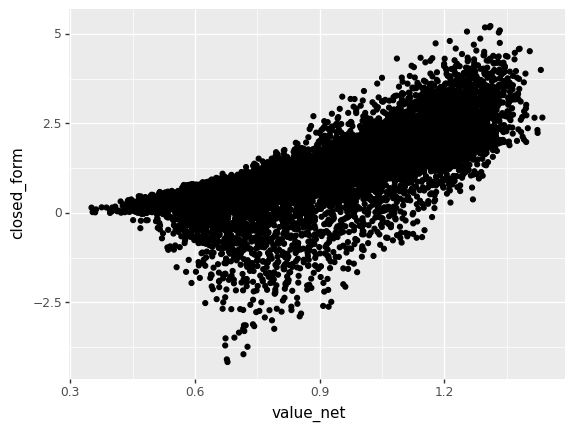

<ggplot: (8737426479637)>

time: 594 ms (started: 2022-07-08 23:16:42 +00:00)


In [ ]:
value_net_results = trainAlloc.value_net(all_samples).detach().cpu().numpy().reshape(-1).tolist()
htx_results = HtxSq(all_samples).cpu().detach().numpy().reshape(-1).tolist()
dataf2 = pd.DataFrame( { 'value_net': value_net_results, 'closed_form': htx_results } )
ggplot(dataf2, aes(x='value_net', y='closed_form')) + geom_point()

In [ ]:
np.mean((dataf2['value_net'] - dataf2['closed_form']) ** 2)

0.8749507435246947

time: 6.38 ms (started: 2022-07-08 23:16:47 +00:00)


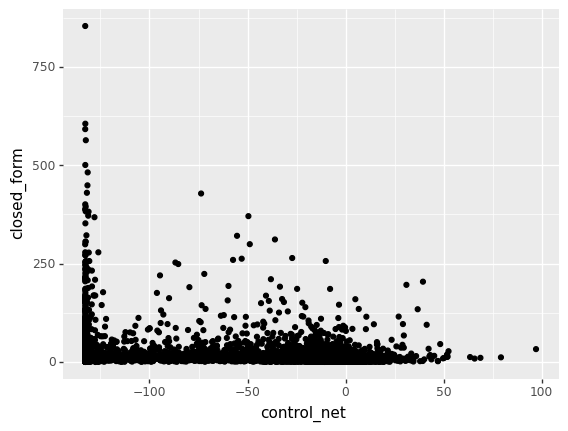

<ggplot: (8737426302501)>

time: 839 ms (started: 2022-07-08 23:16:49 +00:00)


In [ ]:
# plot the control function vs the closed form (ideally straight line...)
dataf = pd.DataFrame( { 'control_net': value_equation.control_net(all_samples).cpu().detach().numpy().reshape(-1).tolist(), 
                       'closed_form': nu_star(all_samples).cpu().detach().numpy().reshape(-1).tolist() } )

temp = dataf[dataf['closed_form'] < 0.1]
ggplot(dataf, aes(x='control_net', y='closed_form')) + geom_point()

In [ ]:
np.mean((dataf['pi_net'] - dataf['closed_form']) ** 2)

2.2059031067189582e-05

time: 9.4 ms (started: 2022-07-08 11:34:25 +00:00)


In [ ]:
np.mean((dataf['pi_net'] - dataf['closed_form']) ** 2)

0.015143210438420724

time: 6.66 ms (started: 2022-07-08 13:52:02 +00:00)


In [ ]:
np.mean((dataf['pi_net'] - dataf['closed_form']) ** 2)

0.023631170541016547

time: 4.19 ms (started: 2022-07-08 14:26:18 +00:00)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
filepath = '/content/drive/MyDrive/DGM'

Mounted at /content/drive
time: 24 s (started: 2022-07-08 14:30:39 +00:00)


In [ ]:
#torch.save(trainMertonAlloc.net.state_dict(), os.path.join(filepath, 'unet_trained_15k_epochs.pt'))
#torch.save(mequation.pi_net.state_dict(), os.path.join(filepath, 'pi_net_trained_15k_epochs_4ep.pt'))

time: 14.2 ms (started: 2022-07-08 07:19:57 +00:00)


In [ ]:
u_net = MertonUtilityNet(NL=2, NN=64)
u_net.load_state_dict(torch.load(os.path.join(filepath, 'unet_trained_15k_epochs.pt')))

<All keys matched successfully>

time: 589 ms (started: 2022-07-08 14:31:30 +00:00)


In [ ]:
u_net.to('cuda:0')

MertonUtilityNet(
  (fc_input): Linear(in_features=5, out_features=64, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
  )
  (fc_output): Linear(in_features=64, out_features=1, bias=True)
)

time: 4.95 ms (started: 2022-07-08 14:31:57 +00:00)


In [ ]:
mequation = MertonEquation(MertonUtilityNet( NL = 1 , NN = 3 ), MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 100, depth=5 ), 1, 10000.0)
# val_sample_to_use = tuple([ x.cpu().detach() for x in mequation.sample(sample_method_X="U", size=1) ] )
val_sample_to_use = mequation.sample(sample_method_X="U", size=1) 
# # gamma = 1.0 # time = 0.0 # mu = 0.05 # r = 0.02 # sigma = 0.25   
val_sample_to_use[0][0,0] = 0.0
val_sample_to_use[0][0,2] = 0.05
val_sample_to_use[0][0,3] = 0.02
val_sample_to_use[0][0,4] = 0.25

In [ ]:
import torch

def u(q):
  x = q[:,1]
  y = q[:, 0]
  return x**2 + y**2
x = torch.randn(3, requires_grad=True)
t = torch.randn(3, requires_grad=True)
u_val = u(torch.cat((x, t), axis=1))

print(x,t,u_val)
print(torch.cat((t,x)))
# 1st derivatives
dt = torch.autograd.grad(u_val, x, grad_outputs=torch.ones_like(u_val), create_graph=True, allow_unused=True)
print(dt[0])
dt = torch.autograd.grad(u_val.sum(), torch.cat((t,x)), create_graph=True)
print(dt[0])
dx = torch.autograd.grad(u_val.sum(), x, create_graph=True)[0]

# 2nd derivatives (higher orders require `create_graph=True`)
ddx = torch.autograd.grad(dx.sum(), x)[0]
ddx

In [ ]:
!nvidia-smi

In [ ]:
2+2

4